In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy import interpolate, integrate
from scipy.integrate import quad, trapz, simps
import sympy as sp
from scipy.interpolate import lagrange
sns.set()

# Zadanie 1

Wiemy że $$ \Delta t  = m*\int_{v_1}^{v_2} \frac{v}{P}dv$$
Możemy wyznaczyć numerycznie całkę $$\int_{v_1}^{v_2} \frac{v}{P}dv$$
Wykonamy to korzystając z metody trapezów.

$$ S(f) = h \left( \frac{f(a)}{2} + \sum_{i=1}^{n-1} f(a+ih) + \frac{f(b)}{2}\right). $$

Nasza funkcja podcałkowa to $$ f(v) = \frac{v}{P}$$

In [80]:
v_data = np.array([0, 1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])   
P_data = np.array([0, 4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2]) 

power_function = interp1d(v_data, P_data, kind='linear')

In [81]:
v1 = 1.0  
v2 = 6.0  
m = 2000  

# Liczba podprzedziałów
n = 100

In [82]:
def integrand(v):
    return v / power_function(v)

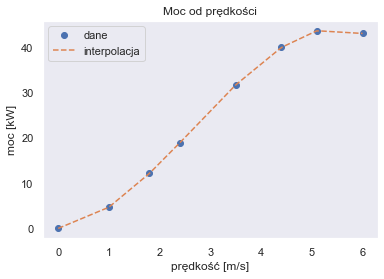

In [83]:
# wykres mocy od prędkości z interpolacją
plt.plot(v_data, P_data, 'o', label='dane')
plt.plot(np.linspace(0, 6, 100), power_function(np.linspace(0, 6, 100)), label='interpolacja', linestyle='--')
plt.xlabel('prędkość [m/s]')
plt.ylabel('moc [kW]')
plt.grid()
plt.legend()
plt.title('Moc od prędkości')
plt.show()

In [84]:
def trapez(f, a, b, n):
    if n == 1:
        h = b - a
        res = h / 2 * (f(a) + f(b))
    else:
        x = np.linspace(a, b, n)
        h = x[1] - x[0]
        res = h / 2 * np.sum(f(x[1:]) + f(x[:-1]))
    return res

result = trapez(integrand, v1, v2, n)

In [85]:
t= m * result
t

1277.6073898705683

In [86]:
print(f"Czas potrzebny do rozpędzenia samochodu od {v1} m/s do {v2} m/s wynosi {t:.2f} sekundy.")

Czas potrzebny do rozpędzenia samochodu od 1.0 m/s do 6.0 m/s wynosi 1277.61 sekundy.


Porównanie z funkcją wbudowaną

In [87]:
result, error = quad(integrand, v1, v2)
t1 = m * result
print("Wynik:", t1)
print("Błąd:", error)

Wynik: 1277.502692806369
Błąd: 9.79282299695683e-09


# Zadanie 2

Skorzystamy z metody Simpsona, do policzenia następującej całki:
$$ \int_{-1}^{1} \cos(2 \cos^{-1}x) \text{d}x .$$

$$ S(f) = \frac{h}{3} \left( f(a) + 2\sum_{i=1}^{n/2-1} f(a+2ih) + 4\sum_{i=1}^{n/2} f(a+(2i-1)h) + f(b) \right). $$

In [88]:
def simpson(f, a, b, n):
    if n == 1:
        h = (b - a) / 2
        res = h / 3 * (f(a) + 4 * f((a + b)/2) + f(b))
    else:
        x = np.linspace(a, b, n)
        h = x[1] - x[0]
        res = h / 6 * np.sum(f(x[:-1]) + 4 * f((x[:-1] + x[1:]) / 2) + f(x[1:]))
    return res, h


In [89]:
def funkcja(x):
    return np.cos(2 * np.arccos(x))

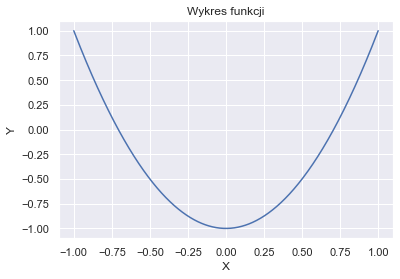

In [90]:
a = 1
b = -1

x_values = np.linspace(a, b, 1000)
y_values = funkcja(x_values)

plt.plot(x_values, y_values)
plt.title('Wykres funkcji')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Używamy tej metody, bo opiera się na przybliżaniu funkcji całkowanej przez interpolację wielomianem drugiego stopnia.

In [91]:
# Obliczenie całki dla 3, 5 i 7 węzłów
n_values = [3, 5, 7]
for n in n_values:
    res, h = simpson(funkcja, -1, 1, n)
    print(f"Dla {n} węzłów: {res}, krok = {h}")

Dla 3 węzłów: -0.6666666666666665, krok = 1.0
Dla 5 węzłów: -0.6666666666666666, krok = 0.5
Dla 7 węzłów: -0.6666666666666667, krok = 0.33333333333333326


Porównanie z funkcją wbudowaną

In [92]:
result = quad(funkcja, -1, 1)

print(f"Wynik z biblioteki scipy: {result[0]}")

Wynik z biblioteki scipy: -0.6666666666666666


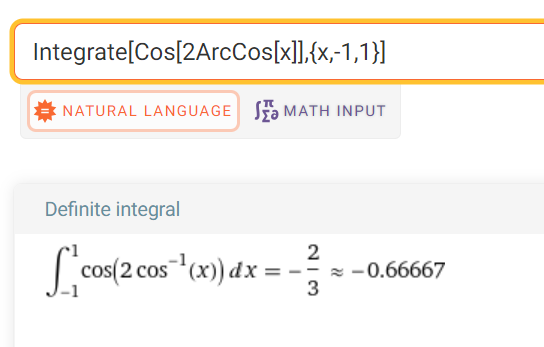

Obliczenia zwiększają się w dokładności w miarę zwiększania liczby węzłów, ponieważ metoda Simpsona jest bardziej dokładna w miarę zwiększania liczby podprzedziałów. 

# Zadanie 3

Skorzystamy teraz z reguły trapezów zaimplementowanej wyżej.

Wykonując przekształcenie powyższej całki używając przekształcenia $x^3 = \frac{1}{t}$ będziemy mieli odpowienie pochodne $\operatorname{d}x = -\frac{1}{3}t^{\frac{-4}{3}} \operatorname{d}t$, ostatecznie otrzymując odpowiednią całkę:
$$ \frac{1}{3} \int_{0}^{1} \frac{1}{t^{4/3} + 1}\operatorname{d}t$$

In [93]:
def integrand(t):
    return 1 / (3 * (t**(4/3) + 1))

In [94]:
v1 = 0
v2 = 1.0
n = 100 

In [95]:
result = trapez(integrand, v1, v2, n)
result

0.24374709714690254

Porównanie z funckją wbudowaną, integrate.quad jest używane do obliczenia całki z funkcji integrand na przedziale od v1 do v2

In [96]:
result, error = integrate.quad(integrand, v1, v2)
result

0.24374774720415945

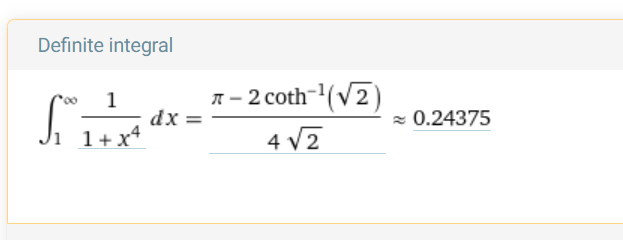

# Zadanie 4

Wykonamy zadanie wykorzystując metodę trapezów.

In [97]:
def h_func(theta_0, theta):
    return 1/np.sqrt(1-(((np.sin(theta_0/2))**2) * ((np.sin(theta))**2)))

In [98]:
def trapez_theta(f, a, b, n, theta):
    if n == 1:
        h = b - a
        wynik = h / 2 * (f(a) + f(b))
    else:
        x = np.linspace(a, b, n)
        h = x[1] - x[0]
        wynik = h / 2 * np.sum(f(theta,x[1:]) + f(theta,x[:-1]))
    return wynik

In [99]:
thetas_0 = [np.pi/4, np.pi/6, np.pi/12]
degrees = [45, 30, 15]
a4 = 0
b4 = np.pi/2
n= 6

In [100]:
for i in range(len(thetas_0)):
    val = trapez_theta(h_func, a4, b4, n, thetas_0[i])
    print(f'Wartość funkcji h dla theta_0 = {degrees[i]} stopni to {val}')

Wartość funkcji h dla theta_0 = 45 stopni to 1.6335863074581534
Wartość funkcji h dla theta_0 = 30 stopni to 1.59814200211254
Wartość funkcji h dla theta_0 = 15 stopni to 1.5775516607636664


Porównanie z funkcją wbudowaną

In [101]:
for i in range(len(thetas_0)):
    val = trapz(h_func(thetas_0[i], np.linspace(a4, b4, n)), np.linspace(a4, b4, n))
    print(f'Wartość funkcji h dla theta_0 = {degrees[i]} stopni to {val}')

Wartość funkcji h dla theta_0 = 45 stopni to 1.6335863074581531
Wartość funkcji h dla theta_0 = 30 stopni to 1.5981420021125399
Wartość funkcji h dla theta_0 = 15 stopni to 1.5775516607636662


In [102]:
print(f'Wartość funkcji h dla theta_0 = 0 stopni to {np.pi/2}')
a = np.pi / 2
a

Wartość funkcji h dla theta_0 = 0 stopni to 1.5707963267948966


1.5707963267948966

Wynik jest zgodny z oczekiwaniami, ponieważ h(0) = pi/2. Reszta wyników również się pokrywa z wbudowaną metodą trapezów.

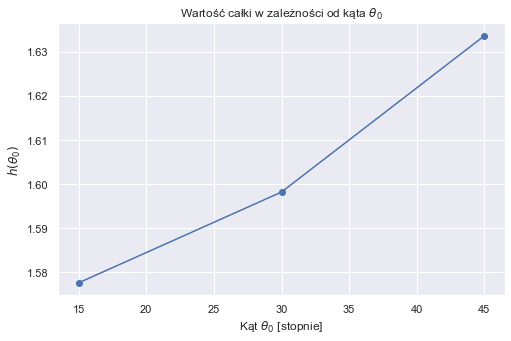

In [103]:
integral_values = []

for theta_0 in thetas_0:
    integral_values.append(trapez_theta(h_func, a4, b4, n, theta_0))

plt.figure(figsize=(8, 5))
plt.plot(degrees, integral_values, marker='o', linestyle='-')
plt.title('Wartość całki w zależności od kąta $\\theta_0$')
plt.xlabel('Kąt $\\theta_0$ [stopnie]')
plt.ylabel('$h(\\theta_0)$')
plt.grid(True)
plt.show()

Im większa $\theta_{0}$ tym większa wartość funkcji.

# Zadanie 5

Obliczymy teraz całkę dla 2 i 4 weźłów z metody Gaussa-Legendra.

In [104]:
def f(x):
    return np.log(x) / (x**2 - 2*x + 2)

def gauss_legendre(func, a, b, n):
    # Węzły i wagi kwadratury Gaussa-Legendre'a
    nodes, weights = np.polynomial.legendre.leggauss(n)

    # Przesunięcie i skala węzłów
    shift = (b + a) / 2
    scale = (b - a) / 2

    # Przesunięcie i skalowanie węzłów
    nodes = shift + scale * nodes
    weights = weights * scale

    # Obliczanie całki numerycznej
    integral_result = sum(w * func(x) for x, w in zip(nodes, weights))

    return integral_result


In [105]:
a=1 # Przedziały całkowania
b=np.pi

n_2 = 2 # Liczba węzłów
n_4 = 4
n_6= 6

In [106]:
# Obliczenie całki dla 2 i 4 węzłów
integral_2 = gauss_legendre(f, a, b, n_2)
integral_4 = gauss_legendre(f, a, b, n_4)
integral_6 = gauss_legendre(f, a, b, n_6)

print(f"Przybliżona wartość całki dla n={n_2}: {integral_2}")
print(f"Przybliżona wartość całki dla n={n_4}: {integral_4}")
print(f"Przybliżona wartość całki dla n={n_6}: {integral_6}")

Przybliżona wartość całki dla n=2: 0.6067250228624488
Przybliżona wartość całki dla n=4: 0.5847680362127092
Przybliżona wartość całki dla n=6: 0.5849425944241328


Widzimy, że im więcej węźłów tym otrzymujemy dokładniejszy wynik.

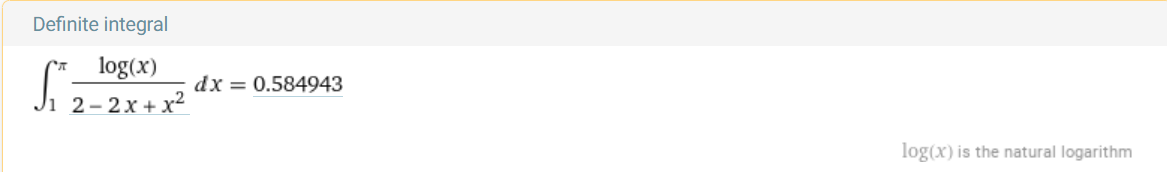

# Zadanie 6

W tym zadaniu wykorzystujemy wzory na pochodne wyznaczone za pomocą metody różnic skończonych oraz Ekstrapolacji Richardsona w celu porównania różnicy między przybliżoną pochodną $f'(x)$ obliczoną za pomocą różnic skończonych, a wartościami rzeczywistymi pochodnymi $D_{f1}$ , $D_{c2}$ i $D_{c4}$.

In [107]:
def f1(x): #funkcje z polecenia
    return x**3 - 2*x

def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(x)

def central_derivative(f, x, h): #centralna pochodna
    return (f(x + h) - f(x - h))/(2*h)

def forward_derivative(f, x, h): # w przód
    return (f(x + h) - f(x))/h

# Inicjalizacja wektora z h
h = np.array([0.1, 0.01, 0.001])
n = len(h)

### **Ekstrapolacja Richardsona dla tego zadania**
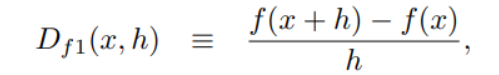 \
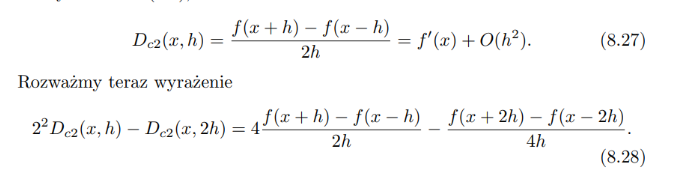 \
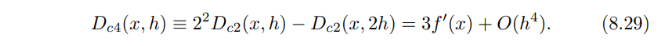 

In [108]:
Df1_f1 = [forward_derivative(f1, 1, i) for i in h]
Df1_f2 = [forward_derivative(f2, np.pi/3, i) for i in h]
Df1_f3 = [forward_derivative(f3, 0, i) for i in h]

In [109]:
Dc2_f1 = [central_derivative(f1, 1, i) for i in h]
Dc2_f2 = [central_derivative(f2, np.pi/3, i) for i in h]
Dc2_f3 = [central_derivative(f3, 0, i) for i in h]

In [110]:
Dc4_f1 = [(2**2)*central_derivative(f1, 1, i) - central_derivative(f1, 1, 2*i) for i in h]
Dc4_f2 = [(2**2)*central_derivative(f2, np.pi/3, i) - central_derivative(f2, np.pi/3, 2*i) for i in h]
Dc4_f3 = [(2**2)*central_derivative(f3, 0, i) - central_derivative(f3, 0, 2*i) for i in h]

 Dla $f_{1}(1) = 1$

In [111]:
d_f1 = np.array([1]*n)
data_1 = {" h ":h, "f'(x) - D_f1":d_f1 - Df1_f1, "f'(x) - D_c2":d_f1 - Dc2_f1, "f'(x) - D_c4":d_f1 - Dc4_f1}

df_1 = pd.DataFrame(data_1)
df_1

,h,f'(x) - D_f1,f'(x) - D_c2,f'(x) - D_c4
0,0.100,-0.310000,-1.000000e-02,-2.0
1,0.010,-0.030100,-1.000000e-04,-2.0
2,0.001,-0.003001,-1.000000e-06,-2.0


Dla bardzo małych wartości ℎ, różnice są jeszcze mniejsze, co wskazuje na bardzo dokładne przybliżenia, im mniejsza różnica, tym lepiej przybliżono pochodną.

Dla $f_{2}(\frac{\pi}{3}) = \frac{1}{2}$

In [112]:
d_f2 = np.array([0.5]*n)
data_2 = {" h ":h, "f'(x) - D_f1":d_f2 - Df1_f2, "f'(x) - D_c2":d_f2 - Dc2_f2, "f'(x) - D_c4":d_f2 - Dc4_f2}

df_2 = pd.DataFrame(data_2)
df_2

,h,f'(x) - D_f1,f'(x) - D_c2,f'(x) - D_c4
0,0.100,0.044098,8.329168e-04,-0.999995
1,0.010,0.004338,8.333292e-06,-1.000000
2,0.001,0.000433,8.333340e-08,-1.000000


Dla $f_{3}(0) = 1$

In [113]:
d_f3 = np.array([1]*n)
data_3 = {" h ":h, "f'(x) - D_f1":d_f3 - Df1_f3, "f'(x) - D_c2":d_f3 - Dc2_f3, "f'(x) - D_c4":d_f3 - Dc4_f3}

df_3 = pd.DataFrame(data_3)
df_3

,h,f'(x) - D_f1,f'(x) - D_c2,f'(x) - D_c4
0,0.100,-0.051709,-1.667500e-03,-1.99999
1,0.010,-0.005017,-1.666675e-05,-2.00000
2,0.001,-0.000500,-1.666667e-07,-2.00000


# Zadanie 7

Tworzymy wielomian interpolacyjny na podstawie podanych punktów (x_values, y_values) korzystając z funkcji polynomial z biblioteki scipy interpolate.

In [114]:
x_i = np.array([0, 0.1, 0.2, 0.3, 0.4])
y_i = np.array([0, 0.078348, 0.138910, 0.192916, 0.244981])

# Utworzenie wielomianu interpolacyjnego 
poly = np.polynomial.Polynomial.fit(x_i, y_i, len(x_i)-1)

# Obliczanie wartości wielomianu i jego pochodnych w punkcie x=0.2
x_point = 0.2
interpolated_value = poly(x_point)
f_prime_0 = poly.deriv()(x_point)
f_double_prime_0 = poly.deriv(2)(x_point)

print(f"Pierwsza pochodna w punkcie x=0.2: {f_prime_0}")

Pierwsza pochodna w punkcie x=0.2: 0.5596358333333328


# Zadanie 8

Tworzymy wielomian interpolacyjny na podstawie podanych punktów (x_values, y_values) korzystając z funkcji polynomial z biblioteki scipy interpolate.

In [115]:
x_values = np.array([-2.2, -0.3, 0.8, 1.9])
y_values = np.array([15.180, 10.962, 1.920, -2.040])

Tworzymy wielomian interpolacyjny Lagrange'a na podstawie podanych punktów (x_values, y_values) korzystając z funkcji lagrange z biblioteki scipy.interpolate

In [116]:
poly = lagrange(x_values, y_values) #Tworzenie wielomianu interpolacyjnego Lagrange'a

x_point = 0 #Obliczenia w punkcie x = 0
interpolated_value = poly(x_point) #Wartość wielomianu w punkcie x=0
f_prime = np.polyder(poly)(x_point) #Pierwsza pochodna wielomianu w punkcie x=0
f_2 = np.polyder(poly, 2)(x_point) #Druga pochodna wielomianu w punkcie x=0

print(f"Wartość  w punkcie 0: {interpolated_value}")
print(f"f'(0): {f_prime}")
print(f"f''(0): {f_2}")

Wartość  w punkcie 0: 8.448
f'(0): -8.560000000000002
f''(0): -0.5999999999999992


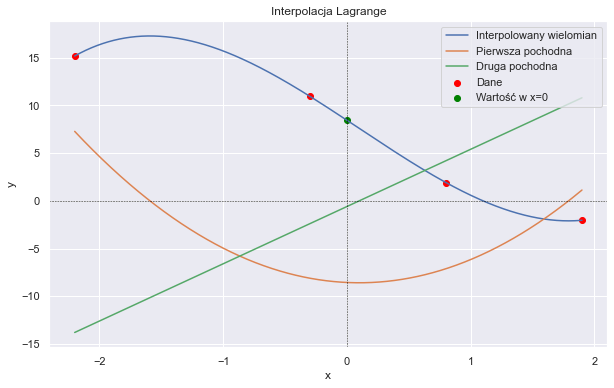

In [117]:
x = np.linspace(min(x_values), max(x_values), 1000)
y = poly(x)
y_prime = np.polyder(poly)(x)
y_double_prime = np.polyder(poly, 2)(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Interpolowany wielomian')
plt.plot(x, y_prime, label="Pierwsza pochodna")
plt.plot(x, y_double_prime, label="Druga pochodna")
plt.scatter(x_values, y_values, color='red', label='Dane')
plt.scatter([0], [poly(0)], color='green', marker='o', label='Wartość w x=0')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Interpolacja Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()